In [18]:
#HISTOGRAM OF ERA DATA AND CESM DATA INPUT/OUTPUT
import pandas as pd
era = pd.read_csv(f'data/cleaned_observed_ann_input.csv')
cesm = pd.read_csv(f'data/cesm_data_variant.csv')
inferred = pd.read_csv('data/forest_carbon_observed_lstm.csv')
cesm = cesm[cesm['year'] >= 1985]
cesm = cesm.groupby(['year','lat','lon']).mean().reset_index()
era = era[era.year < 2015]
cesm_output = cesm[cesm['year'] >= 2013]

0.0 1263.15
0.0 2002.35
0.0 1130.85
0.0 2192.4
0.0 1044.75
0.0 1332.45


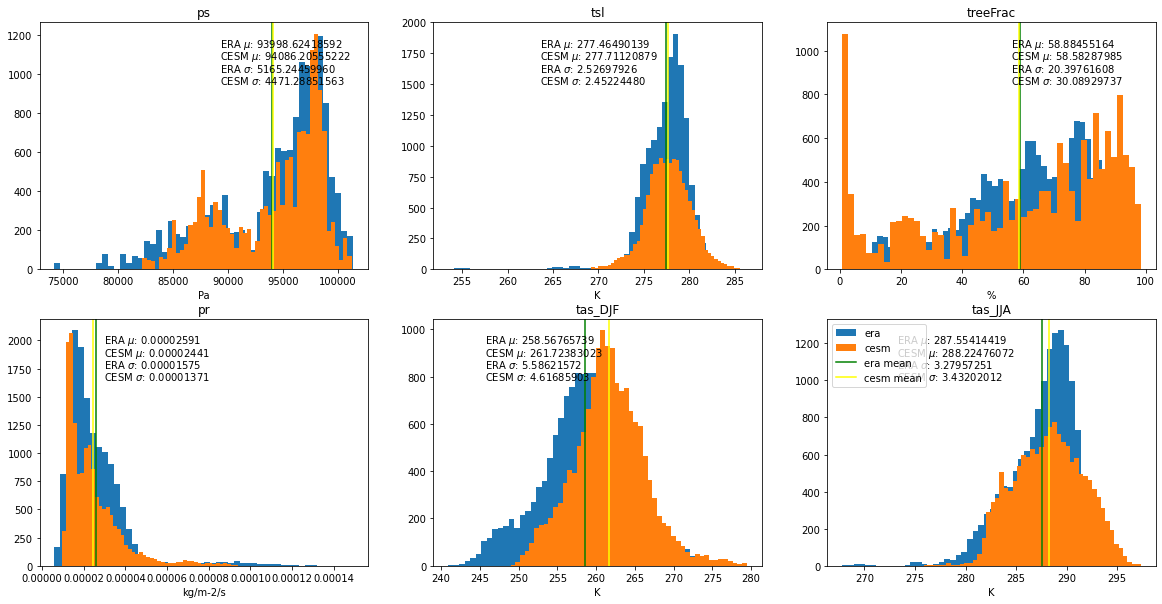

In [37]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(2,3,figsize=(20,10))
ax = ax.flatten()
inputs = ['ps','tsl','treeFrac','pr','tas_DJF','tas_JJA']
input_units = ['Pa','K','%','kg/m-2/s','K','K']
for var_index in range(0,len(inputs)):
    era[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='era')
    cesm[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='cesm')
    ax[var_index].set_xlabel(input_units[var_index])
    ax[var_index].axvline(x=era[inputs[var_index]].mean(),color='green',label='era mean')
    ax[var_index].axvline(x=cesm[inputs[var_index]].mean(),color='yellow',label='cesm mean')
    ax[var_index].title.set_text(inputs[var_index])
    ax[var_index].grid(False)
    # ax[var_index].grid=False
    # plt.hist(era[inputs[var_index]],ax=ax[var_index],bins=100,label='era')
    # plt.hist(cesm[inputs[var_index]],ax=ax[var_index],bins=100,label='cesm')
    min_ylim, max_ylim = ax[var_index].get_ylim()
    print(min_ylim,max_ylim)
    if(inputs[var_index] == 'pr'):
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.9*max_ylim,s='ERA $\mu$: {:.8f}'.format(era[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.85*max_ylim,s='CESM $\mu$: {:.8f}'.format(cesm[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.80*max_ylim,s='ERA $\sigma$: {:.8f}'.format(era[inputs[var_index]].std()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*1.15,y=.75*max_ylim,s='CESM $\sigma$: {:.8f}'.format(cesm[inputs[var_index]].std()))

    else:
        # ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.9*max_ylim,s='ERA Mean: {:.2f}'.format(era[inputs[var_index]].mean()))
        # ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.85*max_ylim,s='CESM Mean: {:.2f}'.format(cesm[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.9*max_ylim,s='ERA $\mu$: {:.8f}'.format(era[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.85*max_ylim,s='CESM $\mu$: {:.8f}'.format(cesm[inputs[var_index]].mean()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.80*max_ylim,s='ERA $\sigma$: {:.8f}'.format(era[inputs[var_index]].std()))
        ax[var_index].text(x=era[inputs[var_index]].mean()*.95,y=.75*max_ylim,s='CESM $\sigma$: {:.8f}'.format(cesm[inputs[var_index]].std()))

plt.legend()

plt.show()


In [10]:
era['tsl'].where(era['tsl'] != 0).mean() #era.where(era['tsl'] == 0))

277.63122076686057

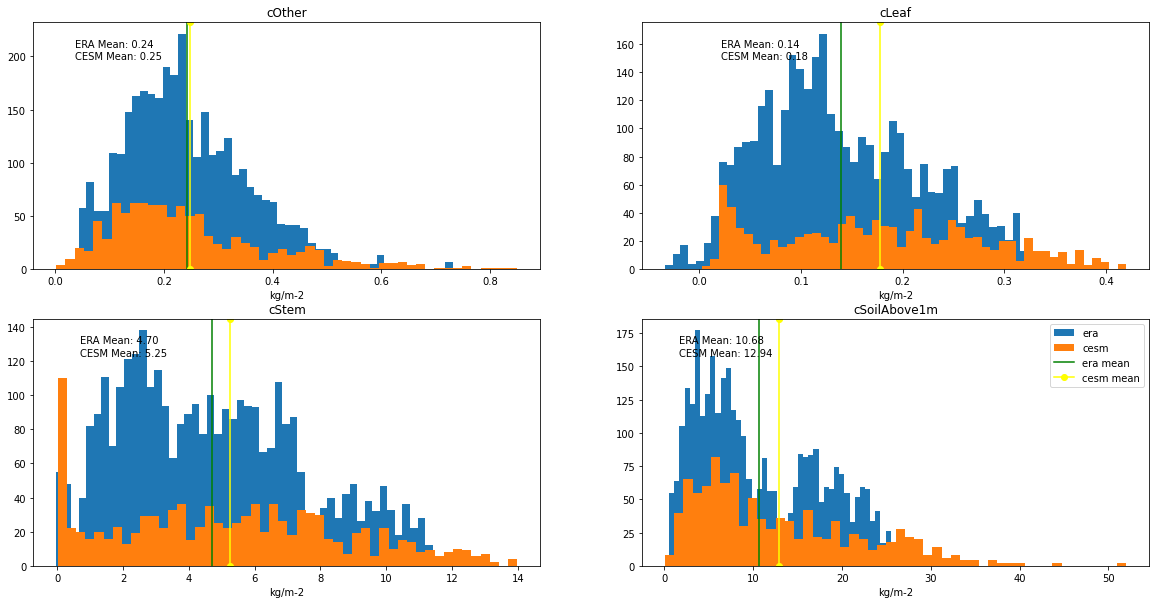

In [80]:
f,ax = plt.subplots(2,2,figsize=(20,10))
ax = ax.flatten()
inputs = ['cOther','cLeaf','cStem','cSoilAbove1m']
input_units = ['kg/m-2','kg/m-2','kg/m-2','kg/m-2']
for var_index in range(0,len(inputs)):
    inferred[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='era')
    cesm_output[inputs[var_index]].hist(ax=ax[var_index],bins=50,label='cesm')
    ax[var_index].set_xlabel(input_units[var_index])
    ax[var_index].axvline(x=inferred[inputs[var_index]].mean(),color='green',label='era mean')
    ax[var_index].axvline(x=cesm_output[inputs[var_index]].mean(),color='yellow',label='cesm mean',marker='o')
    ax[var_index].title.set_text(inputs[var_index])
    ax[var_index].grid(False)
    # ax[var_index].grid=False
    # plt.hist(era[inputs[var_index]],ax=ax[var_index],bins=100,label='era')
    # plt.hist(cesm[inputs[var_index]],ax=ax[var_index],bins=100,label='cesm')
    min_ylim, max_ylim = ax[var_index].get_ylim()
    if(inputs[var_index] == 'pr'):
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*1.15,y=.9*max_ylim,s='ERA Mean: {:.8f}'.format(inferred[inputs[var_index]].mean()))
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*1.15,y=.85*max_ylim,s='CESM Mean: {:.8f}'.format(cesm_output[inputs[var_index]].mean()))
    else:
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*.15,y=.9*max_ylim,s='ERA Mean: {:.2f}'.format(inferred[inputs[var_index]].mean()))
        ax[var_index].text(x=inferred[inputs[var_index]].mean()*.15,y=.85*max_ylim,s='CESM Mean: {:.2f}'.format(cesm_output[inputs[var_index]].mean()))

plt.legend()

plt.show()


In [1]:
#WHY IS SOIL FROM WOOD HARVEST NOT RELATED TO TREE FRAC (SEE infer_reforestation_observed.py)
import pandas as pd
no_reforest_infer = pd.read_csv('no_reforest_infer.csv')
reforest_infer = pd.read_csv('reforest_infer.csv')
observed_input = pd.read_csv('observed_input.csv')
reforested_input = pd.read_csv('reforested_input.csv')


# no_reforest_infer.set_index(['lat','lon'],inplace=True)
# reforest_infer.set_index(['lat','lon'],inplace=True)
# observed_input.set_index(['lat','lon'],inplace=True)
# reforested_input.set_index(['lat','lon'],inplace=True)
def prepForMerge(df,suffix):
    # print(df.index)
    df = df[df['year'] == 2015]
    df.drop(columns=['Unnamed: 0'],inplace=True)

    if(suffix == '_reforested_input'):
        df = df[['year','ps','tsl','treeFrac','pr','lat','lon']]
    df.reset_index(drop=True,inplace=True)
    # print(df.columns)
    df['lat'] = round(df['lat'],6)
    # print(df['lat'].unique())
    df.set_index(['lat','lon'],inplace=True)
    # print(df.index)
    df = df.add_suffix(suffix)
    # print(df.columns)
    return df

no_reforest_infer = prepForMerge(no_reforest_infer,'_no_reforest_infer')
reforest_infer = prepForMerge(reforest_infer,'_reforest_infer')
observed_input = prepForMerge(observed_input,'_observed_input')
reforested_input = prepForMerge(reforested_input,'_reforested_input')
validation_df = pd.concat([no_reforest_infer,reforest_infer,observed_input,reforested_input],axis=1,join='inner').reset_index()


/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_78088/2234178972.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'],inplace=True)
/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_78088/2234178972.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'] = round(df['lat'],6)
/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_78088/2234178972.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

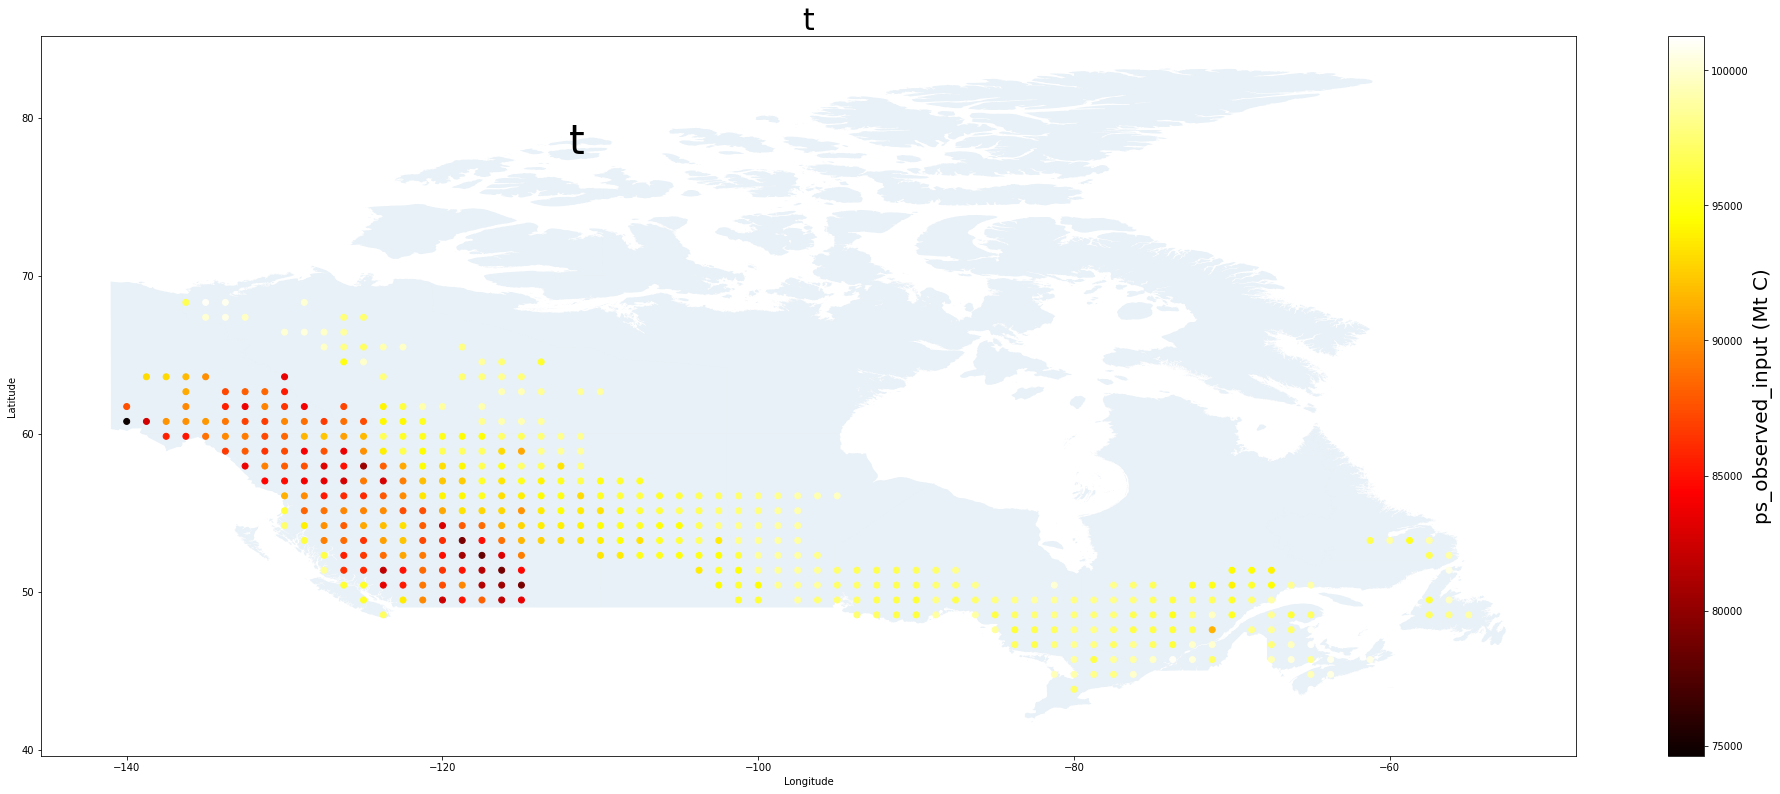

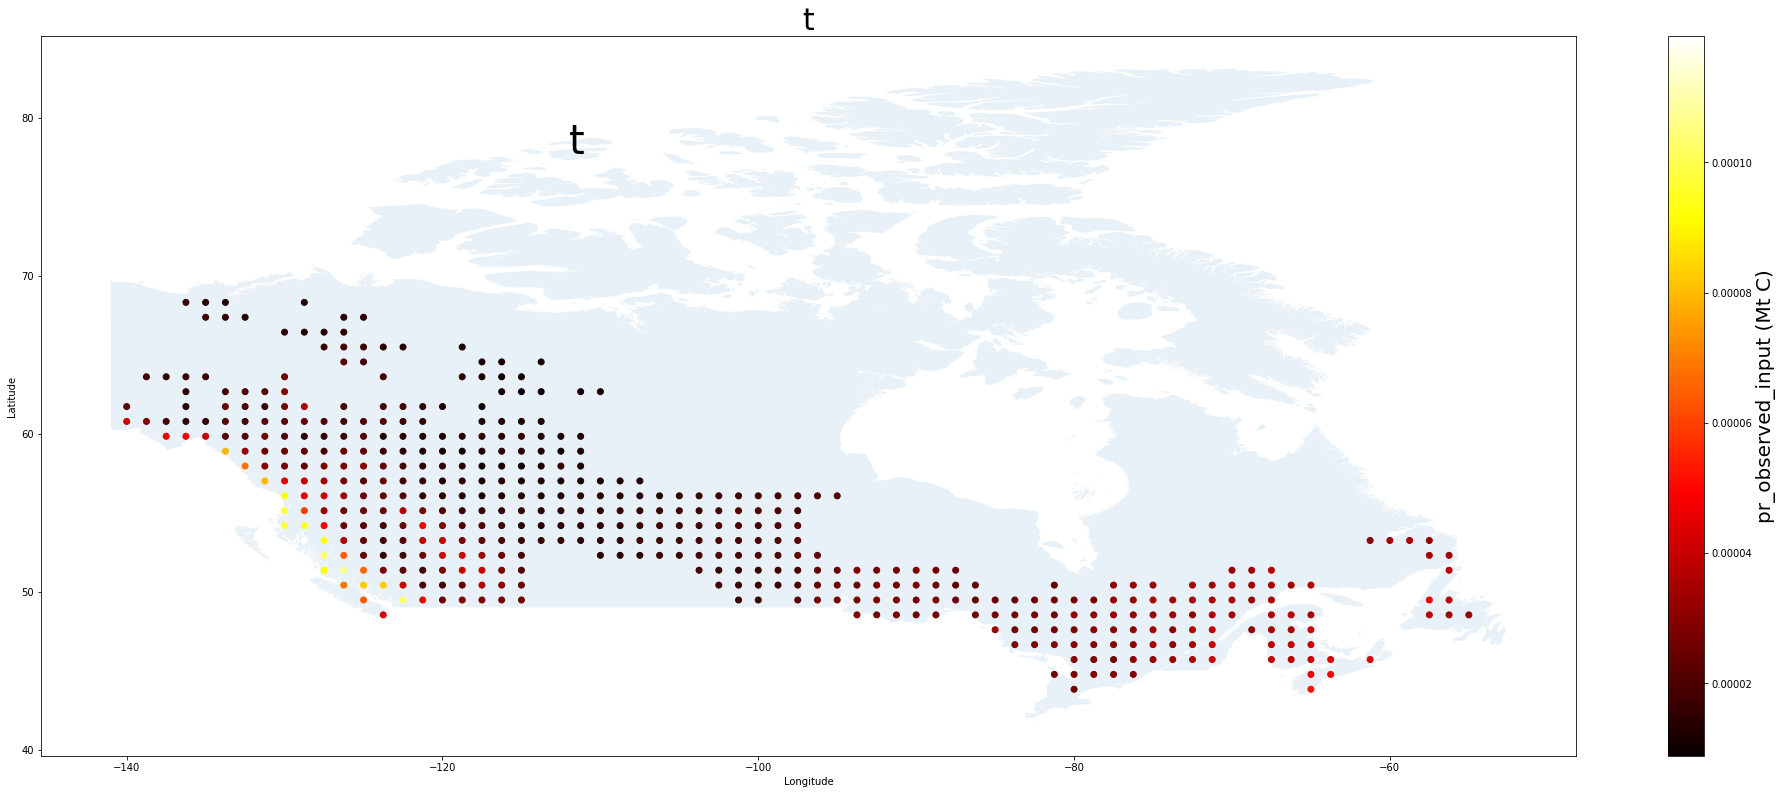

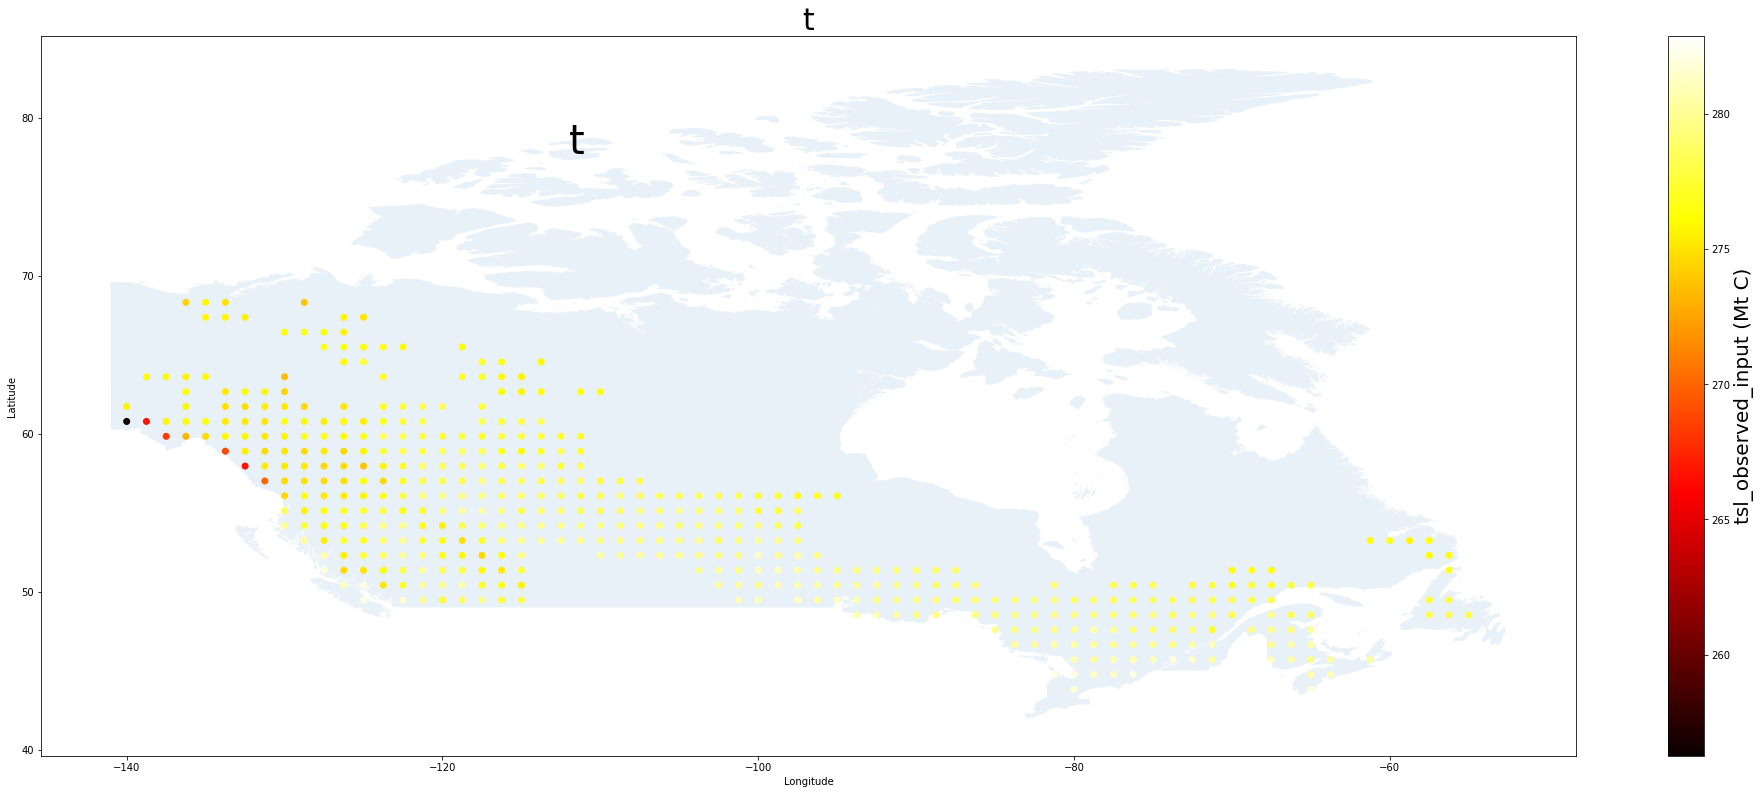

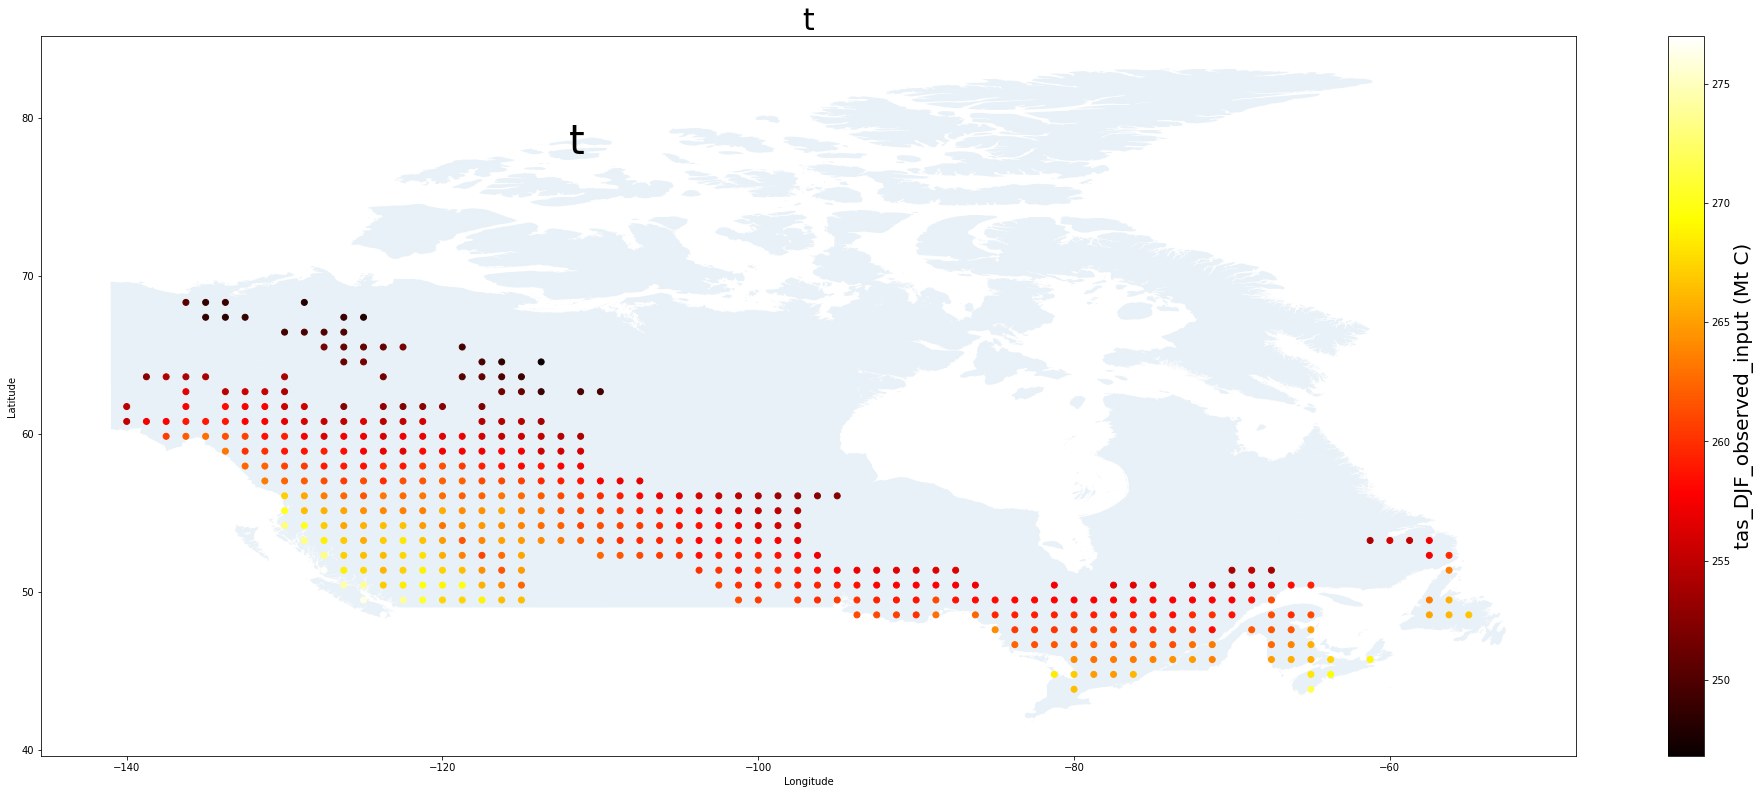

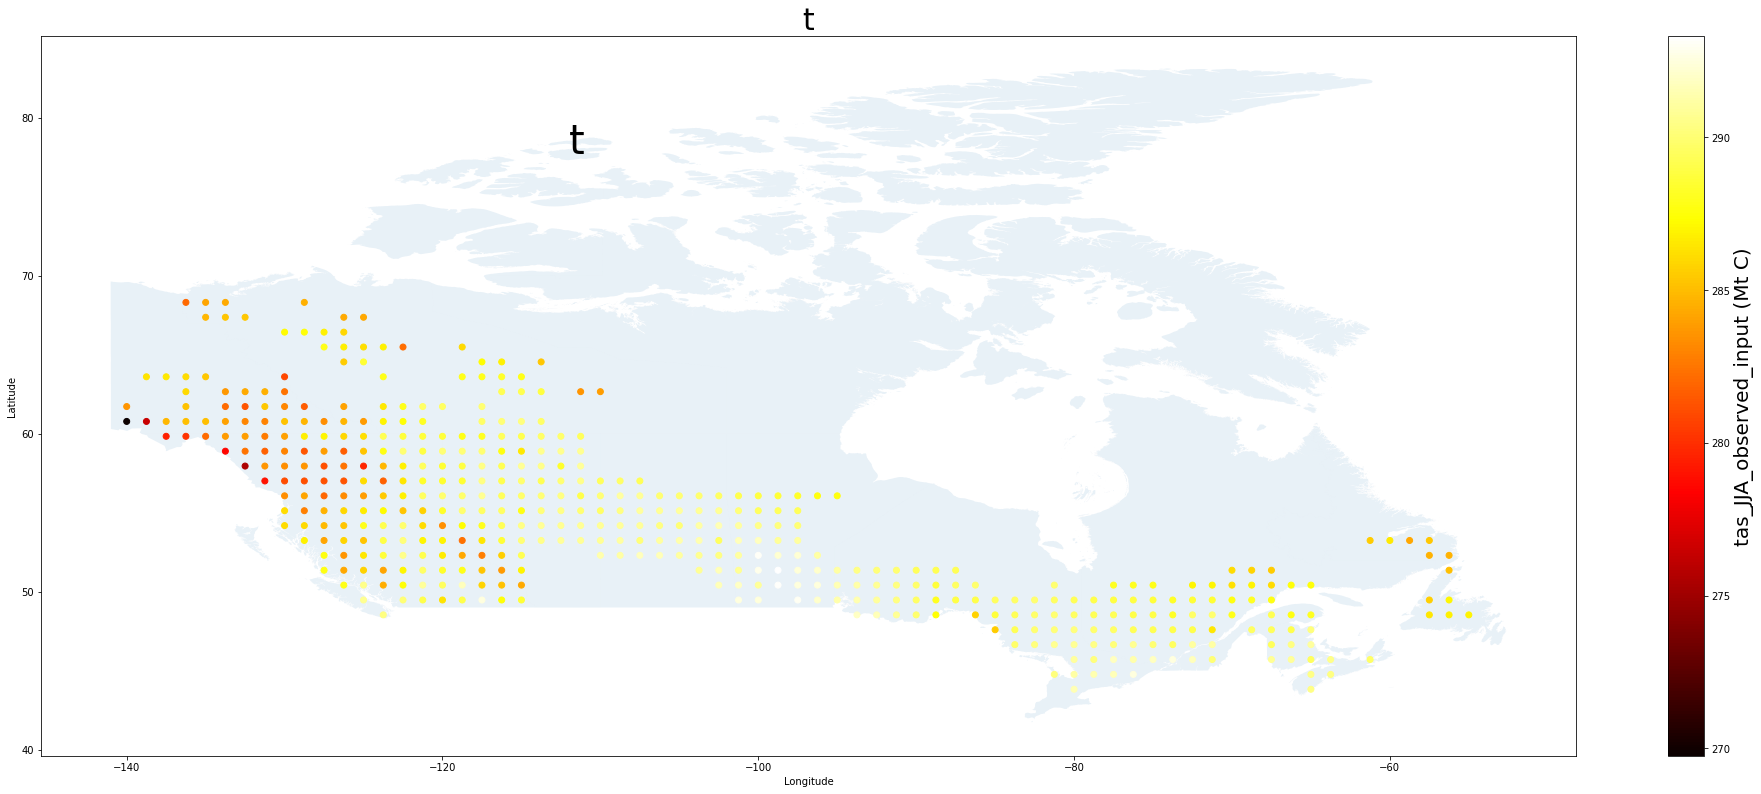

In [2]:
from visualization.plot_helpers import plotCountryWideGridded
import geopandas as gpd
for var in ['ps','pr','tsl','tas_DJF','tas_JJA']:
    var_gdf = gpd.GeoDataFrame(validation_df[var+'_observed_input'],geometry=gpd.points_from_xy(validation_df.lon,validation_df.lat))
    plotCountryWideGridded([var_gdf],var+'_observed_input','t','t')

In [3]:
for var in ['ps','pr','tsl','tas_DJF','tas_JJA','treeFrac']:
    print(var)
    print(validation_df[var+'_observed_input'].corr(validation_df['cSoilAbove1m_no_reforest_infer']))
    print(validation_df[var+'_observed_input'].corr(validation_df['agb_no_reforest_infer']))

ps
-0.5780134476633898
-0.5265508096348175
pr
-0.15195192505550154
0.2904816458641607
tsl
-0.3351952931523579
-0.16403034756786858
tas_DJF
0.18352972498886694
0.4669076711130172
tas_JJA
-0.3613779943969246
-0.30084896137344846
treeFrac
0.17758267596572838
0.4856067426441813
